In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow import keras

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/tmp/ipykernel_614842/3076634767.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-05-30 19:12:01.972746: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 19:12:03.598679: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 19:12:06.816223: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FM

In [2]:
#pip install tensorflow

In [3]:
df = pd.read_csv('data_new.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         373 non-null    int64  
 1   Age (Kyr ago)      373 non-null    float64
 2   BIT index          373 non-null    float64
 3   Rescaled MST (°C)  373 non-null    float64
 4   CO2 (ppmv)         373 non-null    float64
 5   δ18O               373 non-null    float64
 6   GLT_syn            373 non-null    float64
 7   d18O_benthic       373 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 23.4 KB


In [5]:
#x = df[df.columns[3:]].to_numpy()
age = x1 = df[df.columns[1]].to_numpy()
x1 = df[df.columns[3]].to_numpy()[:: -1]
x2 = df[df.columns[4]].to_numpy()[:: -1]
x3 = df[df.columns[5]].to_numpy()[:: -1]
x4 = df[df.columns[6]].to_numpy()[:: -1]
x5 = df[df.columns[7]].to_numpy()[:: -1]
print(x1.shape)
x = np.stack((x1, x2, x3, x5), axis = 1)
y = df[df.columns[2]].to_numpy()[:: -1]

(373,)


In [8]:
x_train, x_temp, y_train, temp = train_test_split(x, y, test_size=0.2, shuffle = False, stratify = None)

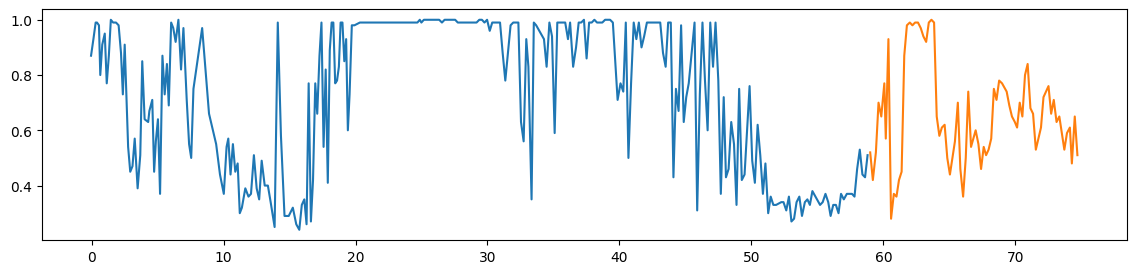

In [7]:
 n = x_train.shape[0]
#x_test.shape
plt.figure(figsize=(14,3))
plt.plot(age[:n],y_train)
plt.plot(age[n:], y_test)

# 1.1 Neural network

In [163]:
model = Sequential(
    [               
        tf.keras.Input(shape=(4,)),    #specify input size
        ### START CODE HERE ### 
        Dense(15, activation = "relu"),
        Dense(50, activation = "relu"),
        Dense(15, activation = "relu"),
        Dense(1, use_bias = True, activation = "sigmoid")
        
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
) 

In [36]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           765 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,656 (6.47 KB)

 Trainable params: 1,656 (6.47 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss = tf.keras.losses.MeanSquaredError, optimizer=tf.keras.optimizers.Adam(0.001))

In [47]:
history = model.fit(
    x_train,y_train,
    epochs=1100
)

Epoch 1/1100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5651
Epoch 2/1100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1235 
Epoch 3/1100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0806 
Epoch 4/1100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0752 
Epoch 5/1100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0761 
Epoch 6/1100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0749 
Epoch 7/1100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0831 
Epoch 8/1100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0747 
Epoch 9/1100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0752 
Epoch 10/1100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0694 
Epoch 11/1100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0649 
Epoch 12/1100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0820 
Epoch 13/1100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1254 
Epoch 14/1100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0900 
Epoch 15/1100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 

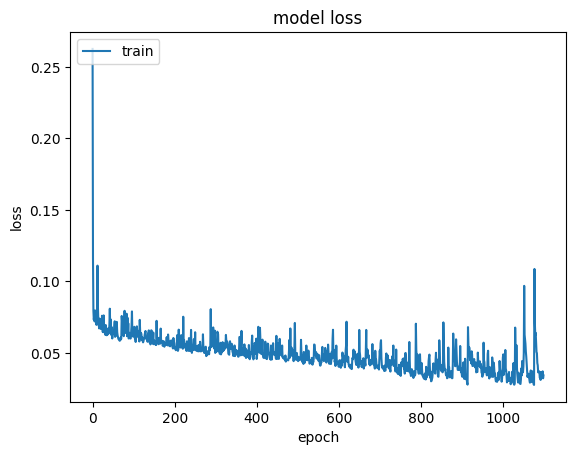

In [48]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
MSE for the training_set: 0.015305531607752014
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MSE for the test_set: 0.010447470181847622
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


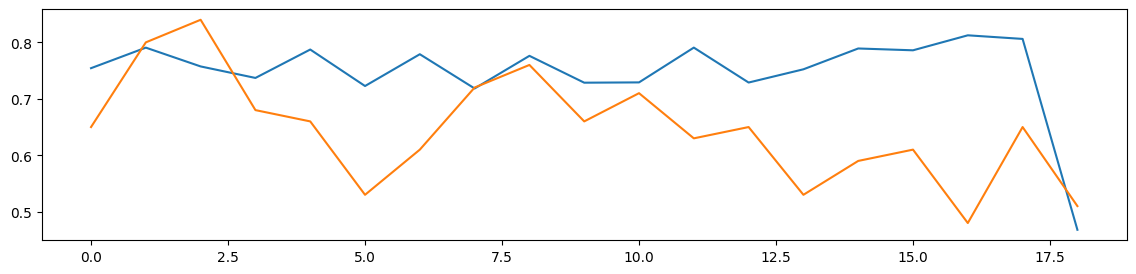

In [49]:
plt.figure(figsize=(14,3))
print("MSE for the training_set:", mean_squared_error(y_train, model.predict(x_train)) / 2)
print("MSE for the test_set:", mean_squared_error(y_test, model.predict(x_test)) / 2)
plt.plot(model.predict(x_test))
#print(model.predict(x_test))
plt.plot(y_test)
#plt.xlim(300, 380)
#plt.xlim(-10, 150)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


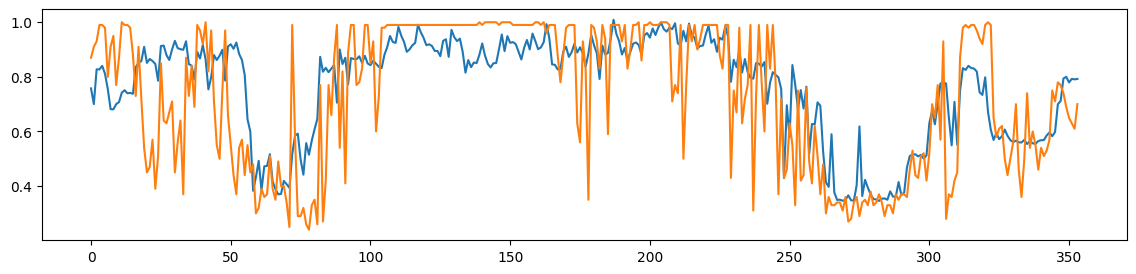

In [50]:
plt.figure(figsize=(14,3))
plt.plot(model.predict(x_train))
plt.plot(y_train)

# 1.2 Fine tuning network

In [49]:
model_re = Sequential(
    [               
        tf.keras.Input(shape=(4,)),    #specify input size
        ### START CODE HERE ### 
        Dense(15, activation = "relu",kernel_regularizer=keras.regularizers.l2(0.01)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(0.01)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(0.01)),
        Dense(15, activation = "relu",kernel_regularizer=keras.regularizers.l2(0.01)),
        Dense(1, use_bias = True, activation = "sigmoid")
        
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
) 

In [85]:
model_2.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 15)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 50)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 15)             │           765 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,206 (16.43 KB)

 Trainable params: 4,206 (16.43 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
model_2.compile(loss = tf.keras.losses.MeanSquaredError, optimizer=tf.keras.optimizers.Adam(0.001))

In [15]:
1111history_2 = model_2.fit(
    x_train,y_train,
    epochs=10001
)

SyntaxError: invalid decimal literal (3273106188.py, line 1)

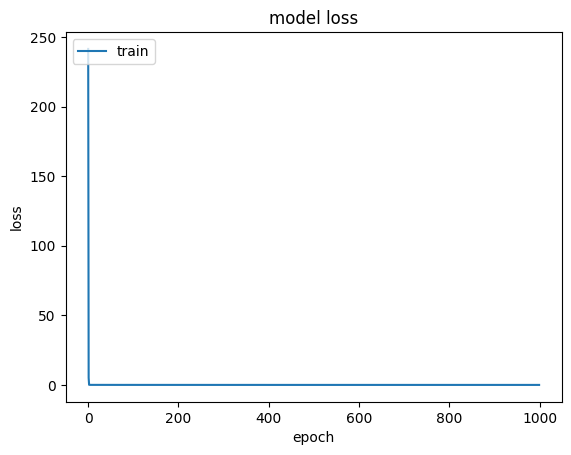

In [96]:
plt.plot(history_2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MSE for the training_set: 0.02653192592897238
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MSE for the test_set: 0.007783778876078235
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


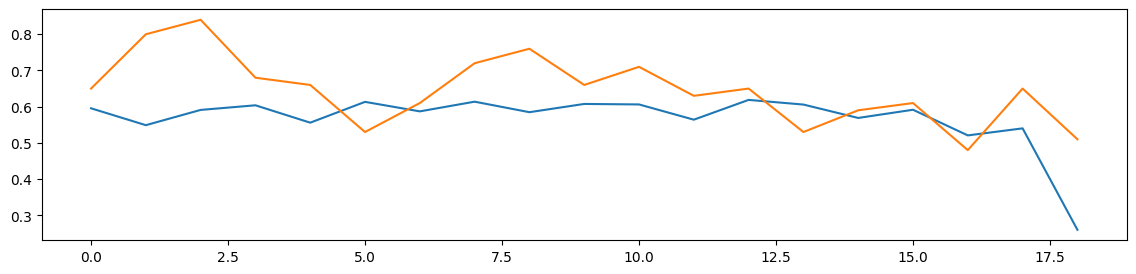

In [97]:
plt.figure(figsize=(14,3))
print("MSE for the training_set:", mean_squared_error(y_train, model_2.predict(x_train)) / 2)
print("MSE for the test_set:", mean_squared_error(y_test, model_2.predict(x_test)) / 2)
plt.plot(model_2.predict(x_test))
#print(model.predict(x_test))
plt.plot(y_test)
#plt.xlim(300, 380)
#plt.xlim(-10, 150)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step


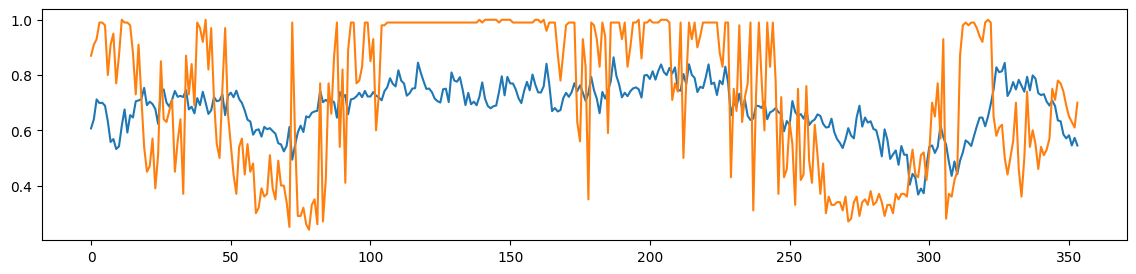

In [98]:
plt.figure(figsize=(14,3))
plt.plot(model_2.predict(x_train))
plt.plot(y_train)

## 2.Linear regression

In [35]:
linear_model = LinearRegression()
poly = PolynomialFeatures(1, include_bias=False)
x_train_mapped = poly.fit_transform(x_train)
scaler_poly = StandardScaler()
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
x_train_mapped_scaled = scaler_poly.fit_transform(x_train)
#linear_model.fit(x_train_mapped_scaled, y_train)

In [36]:
 ridge_pipe = Pipeline([('scale',StandardScaler()),
                              ('poly',PolynomialFeatures(2, interaction_only=False, include_bias=False)),
                              ('ridge', Ridge(alpha = 0, max_iter=5000000))
                              ])

In [37]:
ridge_pipe.fit(x_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge(alpha=0, max_iter=5000000))])

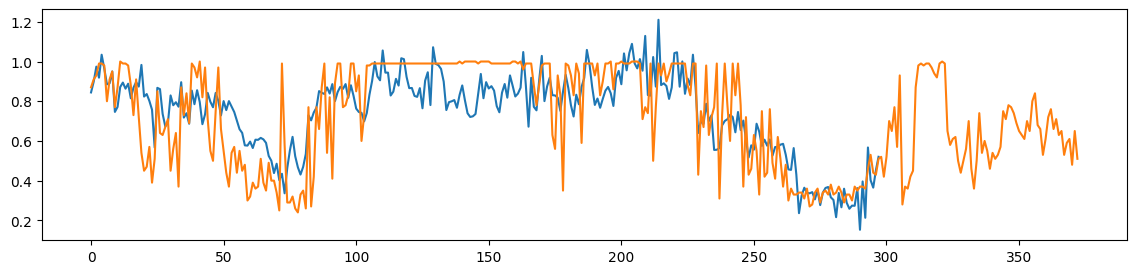

In [38]:
plt.figure(figsize=(14,3))
plt.plot(ridge_pipe.predict(x_train))
plt.plot(y)

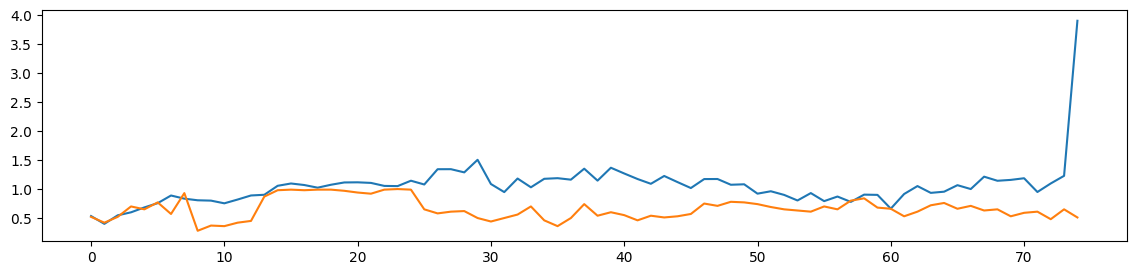

In [39]:
plt.figure(figsize=(14,3))
x_test_mapped = poly.fit_transform(x_test)
x_test_mapped_scaled = scaler_poly.fit_transform(x_test)
plt.plot(ridge_pipe.predict(x_test[:]))
#print(x_test_mapped_scaled)
plt.plot(y_test)

In [40]:
print("MSE for the training_set:", mean_squared_error(y_train, ridge_pipe.predict(x_train)) / 2)
print("MSE for the test_set:", mean_squared_error(y_test, ridge_pipe.predict(x_test)) / 2)

MSE for the training_set: 0.014511984246268012
MSE for the test_set: 0.1721908595345791


In [252]:
reg = 0.015
reg = 0.0
model_2 = Sequential(
    [               
        tf.keras.Input(shape=(4,)),    #specify input size
        ### START CODE HERE ### 
        Dense(15, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(15, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(1, use_bias = True, activation = "linear")
        
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)

In [253]:
model_2.compile(loss = tf.keras.losses.MeanSquaredError, optimizer=tf.keras.optimizers.Adam(0.001))

In [254]:
history = model_2.fit(
    x_train_mapped_scaled,y_train,
    epochs=600
)

Epoch 1/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4648
Epoch 2/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1560 
Epoch 3/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1112  
Epoch 4/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0748 
Epoch 5/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0482 
Epoch 6/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0376 
Epoch 7/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0358 
Epoch 8/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0343 
Epoch 9/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0296 
Epoch 10/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0279 
Epoch 11/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0262 
Epoch 12/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0250 
Epoch 13/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0264 
Epoch 14/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0215 
Epoch 15/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

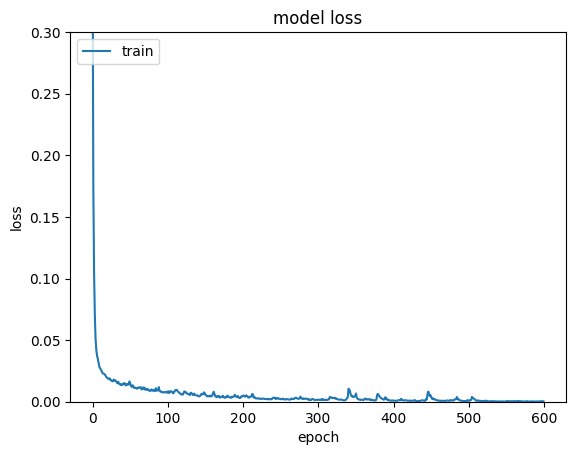

In [255]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 0.3)
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MSE for the training_set: 0.0002577196317504781
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE for the test_set: 0.05272787622677966
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


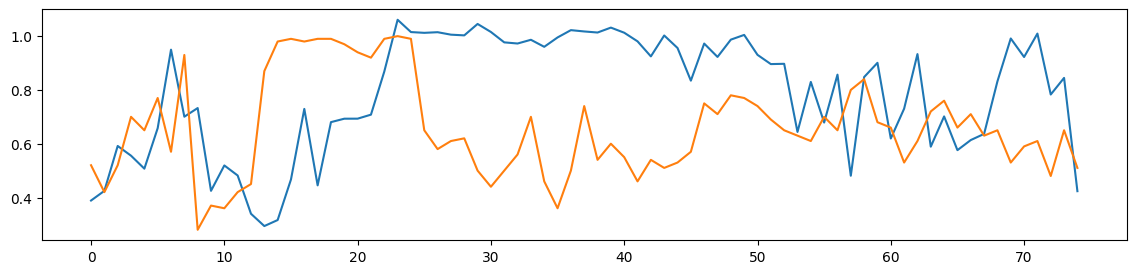

In [256]:
plt.figure(figsize=(14,3))
print("MSE for the training_set:", mean_squared_error(y_train, model_2.predict(x_train_mapped_scaled)) / 2)
print("MSE for the test_set:", mean_squared_error(y_test, model_2.predict(x_test_mapped_scaled)) / 2)
plt.plot(model_2.predict(x_test_mapped_scaled))
#print(model.predict(x_test))
plt.plot(y_test)
#plt.xlim(300, 380)
#plt.xlim(-10, 150)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


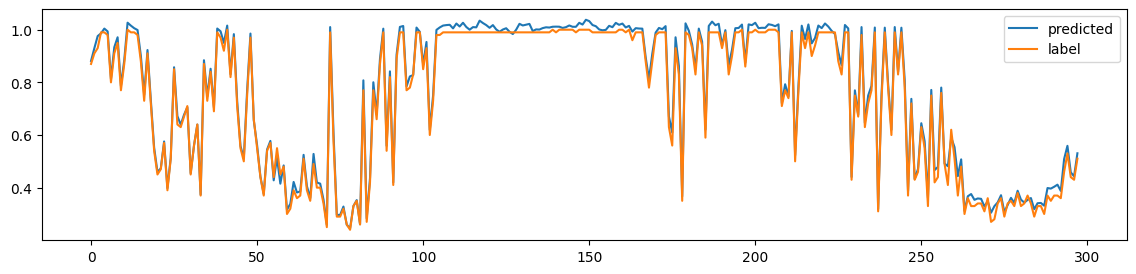

In [257]:
plt.figure(figsize=(14,3))
plt.plot(model_2.predict(x_train_mapped_scaled), label = 'predicted')
plt.plot(y_train, label = 'label')
plt.legend()

In [258]:
reg = 0.025
reg = 0.0
model_3 = Sequential(
    [               
        tf.keras.Input(shape=(4,)),    #specify input size
        ### START CODE HERE ### 
        Dense(15, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(50, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(15, activation = "relu",kernel_regularizer=keras.regularizers.l2(reg)),
        Dense(1, use_bias = True, activation = "linear")
        
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)

In [259]:
model_3.compile(loss = tf.keras.losses.MeanSquaredError, optimizer=tf.keras.optimizers.Adam(0.001))

In [260]:
history = model_3.fit(
    x_train_mapped_scaled,y_train,
    epochs=600
)

Epoch 1/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4940
Epoch 2/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2173 
Epoch 3/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1462 
Epoch 4/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1099 
Epoch 5/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0894 
Epoch 6/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0738 
Epoch 7/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0593 
Epoch 8/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0526 
Epoch 9/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0399 
Epoch 10/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0401 
Epoch 11/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0367 
Epoch 12/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0296 
Epoch 13/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0298 
Epoch 14/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0314 
Epoch 15/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

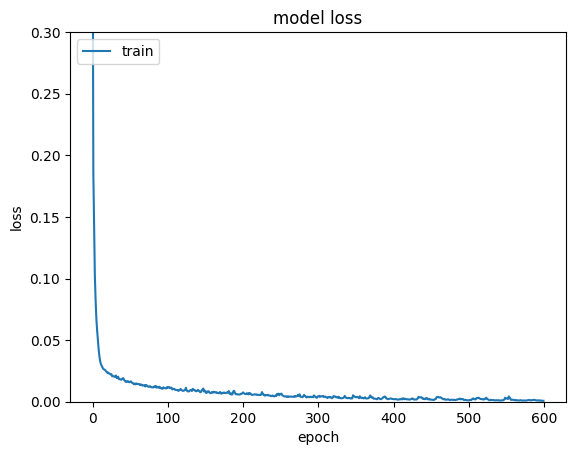

In [261]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 0.3)
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MSE for the training_set: 0.0002928410974604977
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE for the test_set: 0.05970101995058868
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


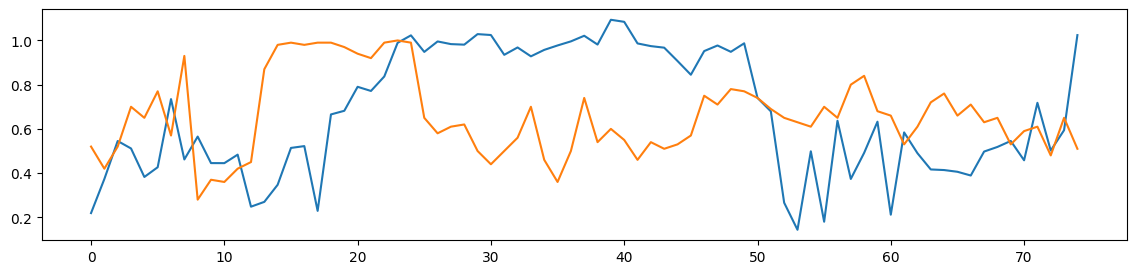

In [262]:
plt.figure(figsize=(14,3))
print("MSE for the training_set:", mean_squared_error(y_train, model_3.predict(x_train_mapped_scaled)) / 2)
print("MSE for the test_set:", mean_squared_error(y_test, model_3.predict(x_test_mapped_scaled)) / 2)
plt.plot(model_3.predict(x_test_mapped_scaled))
#print(model.predict(x_test))
plt.plot(y_test)
#plt.xlim(300, 380)
#plt.xlim(-10, 150)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step


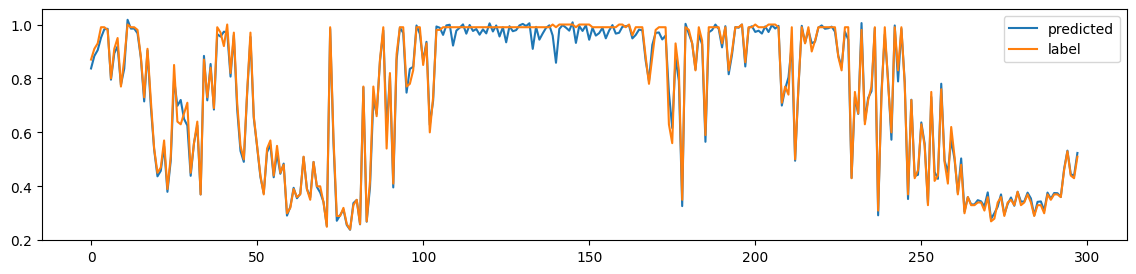

In [263]:
plt.figure(figsize=(14,3))
plt.plot(model_3.predict(x_train_mapped_scaled), label = 'predicted')
plt.plot(y_train, label = 'label')
plt.legend()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


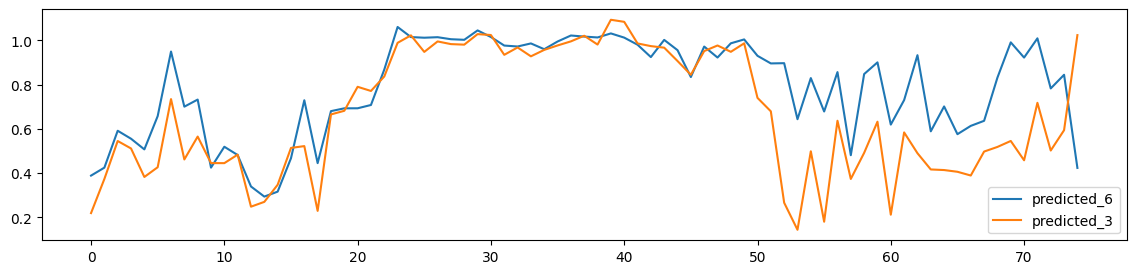

In [264]:
plt.figure(figsize=(14,3))
plt.plot(model_2.predict(x_test_mapped_scaled), label = 'predicted_6')
plt.plot(model_3.predict(x_test_mapped_scaled), label = 'predicted_3')
#plt.plot(y_train)
plt.legend()

In [251]:

model_LS = Sequential([
    tf.keras.Input(shape=(2,)),    #specify input size
    LSTM(50, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

ValueError: Input 0 of layer "lstm_3" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 2)